# **[Data4Life] - Introduction to Data Science**
Topic ***NBA*** - Group ***16***

## **Team Members**

<center>

| No. | Name                   | Student ID |
|-----|------------------------|------------|
| 1   | Trần Nguyễn Nhật Cường | 22127048   |
| 2   | Huỳnh Tấn Đạt          | 22127059   |
| 3   | Nguyễn Công Tuấn       | 22127436   |  
| 4   | Trần Đăng Tuấn         | 22127438   |

</center>

## **Content**
1. Overview
2. Libraries
3. Data Analyze
    - Data Understand
    - Data Filtering
    - Cluster Team

## **1. Overview** <div id = "overview"></div>
**Objective: Analyze Team Weaknesses**
- Identify areas where teams are underperforming:
   - If a team has a low offensive score (ATK), recommend acquiring players strong in scoring metrics (e.g., PTS, FG%, 3P%)
   - If a team has a weak defense, focus on players with high REB, STL, BLK

Approach:
- Aggregate team-level metrics (e.g., average PTS, REB, STL) and compare them across the league
- Identify statistically significant deficiencies (e.g., below the league average)
- Recommend specific player profiles to address these weakness

In this file, we will focus on how performance in each teams during 2020-2025. We need to import:
- `team_stats.csv`: the performance stat of team
- `team_stats_per_game.csv`: the average performance stat of team per game
- `team_ratings`: the rating points of team in whole season

## **2. Libraries**<div id = "libraries"></div>

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## **3. Data Analyze** <div id = "ana"></div>

### **Data Understand**
<div id = "understand"></div>

In [114]:
# Load data
team_stats_avg = pd.read_csv('final_data/team_stats_per_game.csv')
team_stats_total = pd.read_csv('final_data/team_stats.csv')
team_ratings = pd.read_csv('final_data/team_ratings.csv')

In `team_stats.csv` and `team_stats_per_game.csv` has 26 columns where:

| **Column Name**  | **Description**                                                                 |
|------------------|---------------------------------------------------------------------------------|
| **rank**         | The ranking of the team or player based on performance metrics (usually within a season or competition). |
| **team**         | The name or abbreviation of the team being analyzed.                          |
| **g**            | Games played – the total number of games played by the team or player.         |
| **mp**           | Minutes played – the total number of minutes played across all games.          |
| **fg**           | Field goals made – the total number of shots made successfully from the field (both two-point and three-point shots). |
| **fga**          | Field goals attempted – the total number of shots attempted from the field.    |
| **fg%**          | Field goal percentage – the percentage of field goals made out of those attempted. |
| **3p**           | Three-point field goals made – the total number of successful three-point shots made. |
| **3pa**          | Three-point field goals attempted – the total number of three-point shots attempted. |
| **3p%**          | Three-point field goal percentage – the percentage of three-point shots made out of those attempted. |
| **2p**           | Two-point field goals made – the total number of successful two-point shots made. |
| **2pa**          | Two-point field goals attempted – the total number of two-point shots attempted. |
| **2p%**          | Two-point field goal percentage – the percentage of two-point shots made out of those attempted. |
| **ft**           | Free throws made – the total number of successful free throws made.            |
| **fta**          | Free throws attempted – the total number of free throws attempted.             |
| **ft%**          | Free throw percentage – the percentage of free throws made out of those attempted. |
| **orb**          | Offensive rebounds – the number of rebounds collected from the offensive side, after a missed field goal or free throw. |
| **drb**          | Defensive rebounds – the number of rebounds collected from the defensive side, after a missed field goal or free throw. |
| **trb**          | Total rebounds – the total number of rebounds (offensive + defensive).         |
| **ast**          | Assists – the total number of passes that directly lead to a basket.           |
| **stl**          | Steals – the total number of times the team or player took the ball away from an opponent. |
| **blk**          | Blocks – the total number of times a shot was blocked.                         |
| **tov**          | Turnovers – the total number of times the team or player lost possession of the ball to the opposing team. |
| **pf**           | Personal fouls – the total number of fouls committed.                          |
| **pts**          | Points – the total number of points scored by the team or player.              |
| **season**       | The specific season (e.g., 2022-2023) during which the data was collected.     |


In [115]:
team_stats_total.head()

,rank,team,g,mp,fg,fga,fg%,3p,3pa,3p%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season
0,1,Orlando Magic,82,19930,3460,6899,0.502,523,1412,0.370,...,1149,2457,3606,2281,672,488,1297,1726,9091,1994-1995
1,2,Phoenix Suns,82,19830,3356,6967,0.482,584,1584,0.369,...,1027,2403,3430,2198,687,312,1167,1839,9073,1994-1995
2,3,Seattle SuperSonics,82,19830,3310,6741,0.491,491,1305,0.376,...,1068,2337,3405,2115,917,392,1295,2067,9055,1994-1995
3,4,San Antonio Spurs,82,19855,3236,6687,0.484,434,1158,0.375,...,1029,2661,3690,1919,656,456,1246,1871,8742,1994-1995
4,5,Utah Jazz,82,19780,3243,6339,0.512,301,801,0.376,...,874,2412,3286,2256,758,392,1289,2045,8726,1994-1995


In [116]:
team_stats_total.dtypes

rank        int64
team       object
g           int64
mp          int64
fg          int64
fga         int64
fg%       float64
3p          int64
3pa         int64
3p%       float64
2p          int64
2pa         int64
2p%       float64
ft          int64
fta         int64
ft%       float64
orb         int64
drb         int64
trb         int64
ast         int64
stl         int64
blk         int64
tov         int64
pf          int64
pts         int64
season     object
dtype: object

In [117]:
team_stats_avg.head()

,rank,team,g,mp,fg,fga,fg%,3p,3pa,3p%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season
0,1,Orlando Magic,82,243.0,42.2,84.1,0.502,6.4,17.2,0.370,...,14.0,30.0,44.0,27.8,8.2,6.0,15.8,21.0,110.9,1994-1995
1,2,Phoenix Suns,82,241.8,40.9,85.0,0.482,7.1,19.3,0.369,...,12.5,29.3,41.8,26.8,8.4,3.8,14.2,22.4,110.6,1994-1995
2,3,Seattle SuperSonics,82,241.8,40.4,82.2,0.491,6.0,15.9,0.376,...,13.0,28.5,41.5,25.8,11.2,4.8,15.8,25.2,110.4,1994-1995
3,4,San Antonio Spurs,82,242.1,39.5,81.5,0.484,5.3,14.1,0.375,...,12.5,32.5,45.0,23.4,8.0,5.6,15.2,22.8,106.6,1994-1995
4,5,Utah Jazz,82,241.2,39.5,77.3,0.512,3.7,9.8,0.376,...,10.7,29.4,40.1,27.5,9.2,4.8,15.7,24.9,106.4,1994-1995


In [118]:
team_stats_avg.dtypes

rank        int64
team       object
g           int64
mp        float64
fg        float64
fga       float64
fg%       float64
3p        float64
3pa       float64
3p%       float64
2p        float64
2pa       float64
2p%       float64
ft        float64
fta       float64
ft%       float64
orb       float64
drb       float64
trb       float64
ast       float64
stl       float64
blk       float64
tov       float64
pf        float64
pts       float64
season     object
dtype: object

In `team_ratings` has 16 columns, where:

| **Column Name**              | **Description**                                                                 |
|------------------------------|---------------------------------------------------------------------------------|
| **rank**                     | The position or ranking of the team in a league or competition.                |
| **team**                     | The name or abbreviation of the team being analyzed.                          |
| **conf**                     | The conference the team belongs to (e.g., Eastern or Western Conference).      |
| **div**                      | The division within the conference (e.g., Pacific, Atlantic, etc.).           |
| **wins**                     | The total number of games won by the team in the season.                       |
| **losses**                   | The total number of games lost by the team in the season.                     |
| **win_loss_percentage**      | The percentage of games won by the team.                                      |
| **margin_of_victory**        | The average difference in points scored by the team compared to its opponents. |
| **offensive_rating**         | A measure of the team's offensive efficiency (points scored per 100 possessions). |
| **defensive_rating**         | A measure of the team's defensive efficiency (points allowed per 100 possessions). |
| **net_rating**               | The difference between offensive and defensive ratings (overall efficiency).   |
| **adjusted_margin_of_victory** | The margin of victory adjusted for factors like opponent strength and game pace. |
| **adjusted_offensive_victory** | The offensive rating adjusted for opponent strength and other factors.        |
| **adjusted_defensive_rating** | The defensive rating adjusted for opponent strength and other factors.        |
| **adjusted_net_rating**      | The net rating adjusted for opponent strength and other factors.               |
| **season**                   | The specific season (e.g., 2022-2023) during which the data was collected.    |


In [119]:
team_ratings.head()

,rank,team,conf,div,wins,losses,win_loss_percentage,margin_of_victory,offensive_rating,defensive_rating,net_rating,adjusted_margin_of_victory,adjusted_offensive_victory,adjusted_defensive_rating,adjusted_net_rating,season
0,1,Utah Jazz,W,M,60,22,0.732,7.99,115.18,106.48,8.70,7.75,115.00,106.58,8.43,1994-1995
1,2,Seattle SuperSonics,W,P,57,25,0.695,8.18,115.51,107.06,8.45,7.91,115.34,107.19,8.16,1994-1995
2,3,Orlando Magic,E,A,57,25,0.695,7.06,115.89,108.48,7.41,6.44,115.90,109.13,6.77,1994-1995
3,4,San Antonio Spurs,W,M,62,20,0.756,5.96,112.31,106.04,6.27,5.90,112.13,105.93,6.19,1994-1995
4,5,Chicago Bulls,E,C,47,35,0.573,4.83,110.15,105.13,5.02,4.31,110.00,105.51,4.49,1994-1995


In [120]:
team_ratings.dtypes

rank                            int64
team                           object
conf                           object
div                            object
wins                            int64
losses                          int64
win_loss_percentage           float64
margin_of_victory             float64
offensive_rating              float64
defensive_rating              float64
net_rating                    float64
adjusted_margin_of_victory    float64
adjusted_offensive_victory    float64
adjusted_defensive_rating     float64
adjusted_net_rating           float64
season                         object
dtype: object

### **Data Filtering** <div id = 'filter'> </div>
Because we only attemp to analyze from 2020-2025, so we only keep season from 2020-2025

In [121]:
season_need = ['2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024']

In [122]:
team_stats_total = team_stats_total[team_stats_total['season'].isin(season_need)]
team_stats_avg = team_stats_avg[team_stats_avg['season'].isin(season_need)]
team_ratings = team_ratings[team_ratings['season'].isin(season_need)]

team_stats_total.reset_index(drop=True, inplace=True)
team_stats_avg.reset_index(drop=True, inplace=True)
team_ratings.reset_index(drop=True, inplace=True)

### **Cluster Team** 
<div id = 'team'> </div>

#### **Attacking**

To define the attack point, prioritize `fg%`, `3p%`, `ft%`, and `tov`. These attributes collectively measure scoring ability, efficiency, and opportunities created.

##### **Objective 1:** Identify the average `Points` was made over 2020-2025

In [123]:
# Take out the points columns
avg_points_per_games = team_stats_avg[['season', 'pts']]
avg_points_total = team_stats_total[['season', 'pts']]

avg_points_per_games = avg_points_per_games.groupby('season').mean()
avg_points_total = avg_points_total.groupby('season').mean()

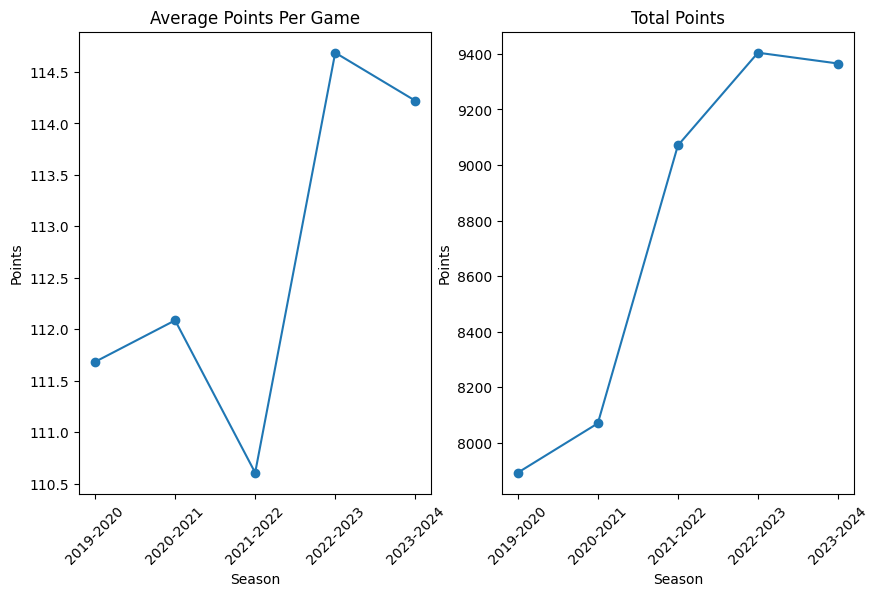

In [124]:
# Plot the average points per game
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(avg_points_per_games, marker='o')
plt.title('Average Points Per Game')
plt.xlabel('Season')
plt.ylabel('Points')
plt.xticks(rotation=45)

# Plot the total points
plt.subplot(1, 2, 2)
plt.plot(avg_points_total, marker='o')
plt.title('Total Points')
plt.xlabel('Season')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

In [125]:
team_stats_avg[['g', 'season']].groupby('season').sum().reset_index()

,season,g
0,2019-2020,2118
1,2020-2021,2160
2,2021-2022,2460
3,2022-2023,2460
4,2023-2024,2460


Performance Analysis Over Time:
- The steep rise in both average and total points during the `2022-2023` season suggests an exceptional offensive season.
- Teams may have adopted a more conservative or less aggressive offensive strategy in `2021-2022`, prioritizing possession control or slower game pacing.

##### **Objective 2:** Clustering team with attack attributes

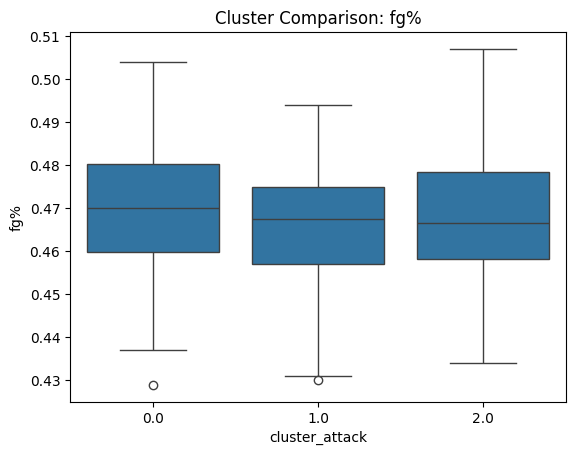

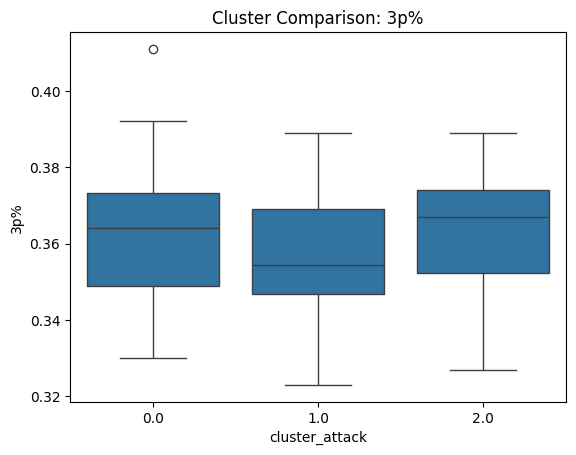

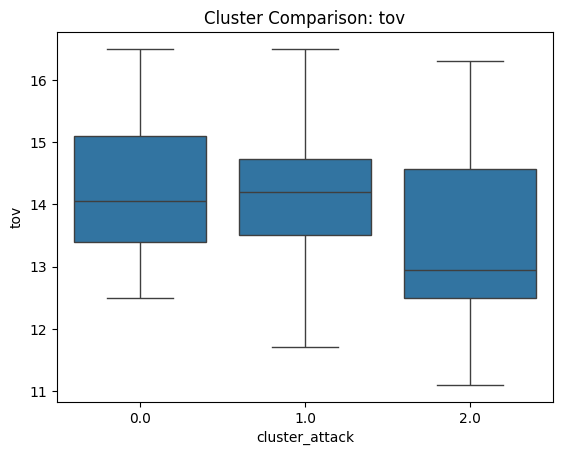

In [126]:
features = ['3p%', 'fg%', 'tov']

kmeans = KMeans(n_clusters=3, random_state=42)

for season in season_need:
    data = team_stats_avg[team_stats_avg['season'] == season][features]
    kmeans.fit(data)
    team_stats_avg.loc[team_stats_avg['season'] == season, 'cluster_attack'] = kmeans.labels_

# Boxplot to compare clusters on key offensive metrics
for feature in ['fg%', '3p%', 'tov']:
    sns.boxplot(x='cluster_attack', y=feature, data=team_stats_avg)
    plt.title(f'Cluster Comparison: {feature}')
    plt.show()


Observations:
1. FG% (Field Goal Percentage):

    - **Cluster 2** has the highest median FG%, indicating it represents teams with the best shooting efficiency.

    - **Cluster 0** and **Cluster 1** have lower median FG% compared to Cluster 2, with Cluster 1 being the lowest.

2. 3P% (Three-Point Percentage):

    - **Cluster 2** again has the highest median 3P%, showing the best long-range shooting accuracy.

    - **Cluster 0** and **Cluster 1** have comparable medians, but **Cluster 1** shows slightly lower accuracy overall.

3. TOV (Turnovers):

    - **Cluster 2** has the lowest median TOV, indicating better ball control and fewer turnovers.

    - **Cluster 1** has the highest median TOV, indicating poor ball control.

    - **Cluster 0** has intermediate turnover values, better than **Cluster 1** but worse than **Cluster 2**.

Summary:
- **Cluster 2**: Best Attack (High FG%, High 3P%, Low TOV)
- **Cluster 1**: Bad Attack (Low FG%, Low 3P%, High TOV)
- **Cluster 0**: Balanced Attack (Moderate FG%, 3P%, and TOV)

##### **Objective 3:** Which teams have bad attack in 2019-2020 and their win-rate?

In [127]:
team_stats_avg['cluster_attack'] = team_stats_avg['cluster_attack'].astype('int')
bad_att_team_2019 = team_stats_avg[(team_stats_avg['season'] == '2019-2020') & (team_stats_avg['cluster_attack'] == 1)]
bad_att_team_2019 = bad_att_team_2019.reset_index(drop=True)

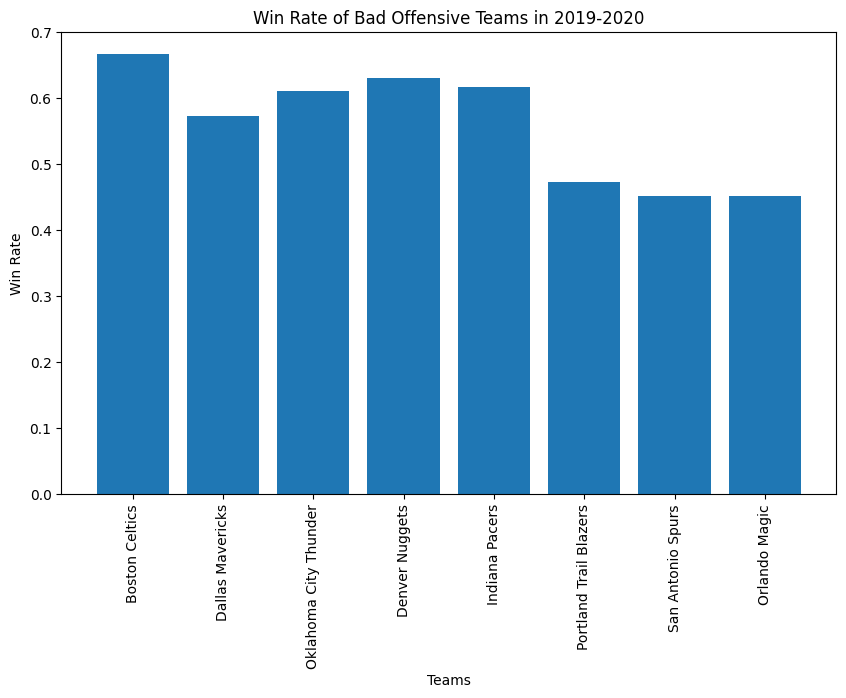

In [128]:
bad_att_team_2019_names = bad_att_team_2019['team']
team_ratings_2019 = team_ratings[(team_ratings['season'] == '2019-2020') & (team_ratings['team'].isin(bad_att_team_2019_names))]
team_ratings_2019 = team_ratings_2019.reset_index(drop=True)

# Plot the win-rate
plt.figure(figsize=(10, 6))
plt.bar(team_ratings_2019['team'], team_ratings_2019['win_loss_percentage'])
plt.title('Win Rate of Bad Offensive Teams in 2019-2020')
plt.xlabel('Teams')
plt.ylabel('Win Rate')
plt.xticks(rotation=90)
plt.show()

As we can see from the plot, 7 out of 14 teams has the win-rate up to **0.6%**. Then, the 4 next teams has win-rate approximately **0.5%**. However, the last 3 teams had the win-rate lower than **0.4%**.

It leads to a conclusion that though it may perform bad attacks, their defense might be great, lets find out.

#### **Defensive**

To define the defense point, prioritize `drb`, `stl`, and `blk`. These attributes collectively measures a clear representation of defensive effectiveness. 


##### **Objective 4:** Clustering team with defense attributes

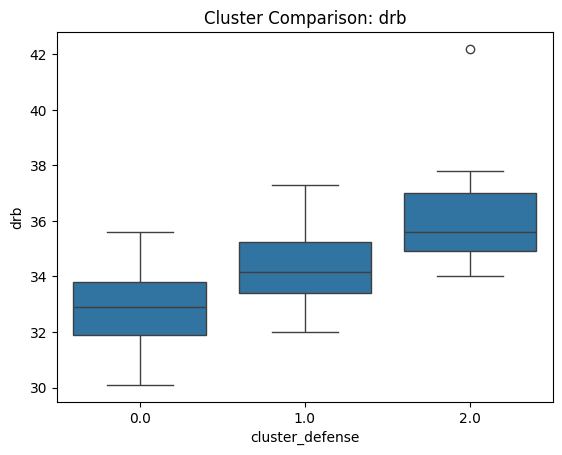

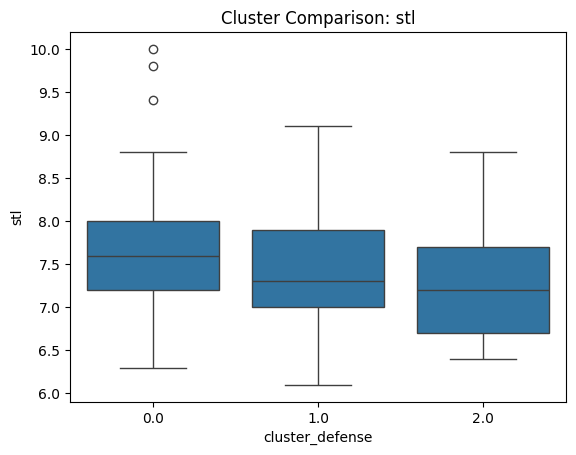

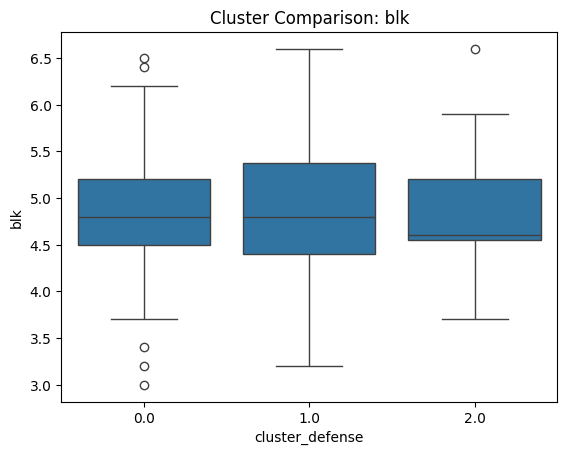

In [129]:
defense_features = ['drb', 'stl', 'blk']

for season in season_need:
    data = team_stats_avg[team_stats_avg['season'] == season][defense_features]
    kmeans.fit(data)
    team_stats_avg.loc[team_stats_avg['season'] == season, 'cluster_defense'] = kmeans.labels_

# Boxplot to compare clusters on key defensive metrics
for feature in defense_features:
    sns.boxplot(x='cluster_defense', y=feature, data=team_stats_avg)
    plt.title(f'Cluster Comparison: {feature}')
    plt.show()

Observations

1. DRB (Defensive Rebounds)
    - **Cluster 0**: Moderate median (~34), with one outlier above 42. Teams in this cluster are decent at defensive rebounding.
    - **Cluster 1**: Slightly better median (~35) than Cluster 0, with smaller variability, indicating consistent but not exceptional rebounding.
    - **Cluster 2**: Similar median (~34-35) to Cluster 0 and 1, showing no significant standout in rebounding.

2. STL (Steals)
    - **Cluster 0**: The highest median (~7.8), with several outliers approaching 10. This cluster excels at forcing turnovers via steals.
    - **Cluster 1**: Lowest median (~7.0), with limited variability. Teams in this cluster are weaker in disrupting opponent ball-handling.
    - **Cluster 2**: Moderate median (~7.2), slightly better than Cluster 1 but worse than Cluster 0, indicating average steal performance.

3. BLK (Blocks)
    - **Cluster 0**: Moderate median (~5.0), with better performance than Cluster 1 but weaker than Cluster 2. Represents average rim protection.
    - **Cluster 1**: Lowest median (~4.5), with minimal variability and some outliers below 3. Teams in this cluster struggle with rim protection.
    - **Cluster 2**: Highest median (~5.8), with a wide IQR and one outlier near 6.5. Represents the strongest rim protection.

Summary
- **Cluster 0**: Disruptive Defense (High steals, moderate blocks, average rebounds). Teams focus on forcing turnovers through steals.
- **Cluster 1**: Weak Defense (Low steals, low blocks, moderate rebounds). Teams struggle in all key defensive metrics.
- **Cluster 2**: Strong Interior Defense (High blocks, moderate steals, moderate rebounds). Teams excel in rim protection but are less focused on perimeter disruption.


##### **Objective 5:** Find out the team with bad attack. Did it have good defense? 

In [130]:
bad_att_team_2019 = team_stats_avg[(team_stats_avg['season'] == '2019-2020') & (team_stats_avg['cluster_attack'] == 1)]
bad_att_team_2019 = bad_att_team_2019.reset_index(drop=True)
bad_att_team_2019

,rank,team,g,mp,fg,fga,fg%,3p,3pa,3p%,...,trb,ast,stl,blk,tov,pf,pts,season,cluster_attack,cluster_defense
0,3,Dallas Mavericks,75,242.3,41.7,90.3,0.461,15.1,41.3,0.367,...,46.9,24.7,6.1,4.8,12.7,19.5,117.0,2019-2020,1,1.0
1,6,Portland Trail Blazers,74,241.0,42.2,91.2,0.463,12.9,34.1,0.377,...,45.3,20.6,6.3,6.1,12.8,21.7,115.0,2019-2020,1,1.0
2,8,San Antonio Spurs,71,242.5,42.2,89.4,0.472,10.7,28.5,0.376,...,44.6,24.7,7.3,5.5,12.6,19.4,114.1,2019-2020,1,1.0
3,9,Boston Celtics,72,242.1,41.3,89.6,0.461,12.6,34.5,0.364,...,46.1,23.0,8.3,5.6,13.8,21.6,113.7,2019-2020,1,1.0
4,18,Denver Nuggets,73,243.1,42.0,88.9,0.473,11.0,30.6,0.359,...,44.1,26.7,8.0,4.6,13.8,20.3,111.3,2019-2020,1,0.0
5,21,Oklahoma City Thunder,72,242.1,40.0,85.5,0.468,10.7,30.2,0.355,...,42.9,21.7,7.6,4.9,13.7,19.3,110.4,2019-2020,1,1.0
6,23,Indiana Pacers,73,241.4,42.1,88.5,0.476,10.2,28.0,0.363,...,42.8,25.9,7.4,5.2,13.2,19.8,109.4,2019-2020,1,0.0
7,24,Orlando Magic,73,240.7,39.3,88.6,0.444,11.1,32.2,0.343,...,44.5,23.9,8.2,5.4,12.8,18.3,107.3,2019-2020,1,0.0
